## Processing k6 results

In [52]:
import json
SETUP_PATH = '../common/setup.json'
f = open(SETUP_PATH)
data = json.load(f)

In [53]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [54]:
import sys
sys.path.append('../common')
import utils

dir = utils.get_last_result_dir(setup_data=data)
print(dir)

for key in data["apps"]:
    fw = data["apps"][key]
    path = f'./{dir}/{fw["name"]}.csv'
    print(path)
    data["apps"][key]['df'] = pd.read_csv(path)

out/out_2023-11-04_14-07-48
./out/out_2023-11-04_14-07-48/dotnet.csv
./out/out_2023-11-04_14-07-48/django.csv
./out/out_2023-11-04_14-07-48/nestjs.csv


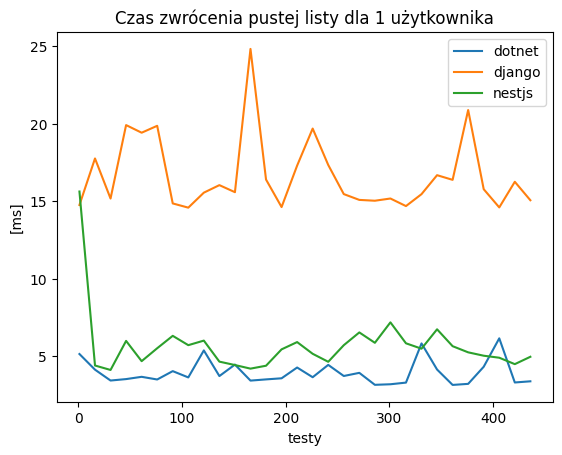

In [55]:
for key in data["apps"]:
    fw = data["apps"][key]
    df = fw['df']
    df_1 = df.loc[(df['metric_name'] == 'http_req_duration')][:]
    duration = df_1['metric_value']
    title = f'Czas zwrócenia pustej listy dla {data["vus"]} {"użytkowników" if data["vus"] > 1 else "użytkownika"}'
    sns.lineplot(data=duration, label=f'{fw["name"]}').set(title=title, xlabel="testy", ylabel="[ms]")
    plt.savefig('Request_duration_for_1_user.png')

In [60]:
df_2 = pd.DataFrame()
for key in data["apps"]:
    fw = data["apps"][key]
    df = fw['df']
    df_1 = df.loc[(df['metric_name'] == 'http_req_duration')][:]
    df_1 = df_1.filter(['timestamp', 'metric_value'])
    df_2[key + '_duration'] = df_1['metric_value']
df_2.describe()

,dotnet_duration,django_duration,nestjs_duration
count,30.000000,30.000000,30.000000
mean,3.939408,16.669611,5.690469
std,0.784409,2.396323,2.033530
min,3.144985,14.581471,4.109978
25%,3.424829,15.064739,4.654732
50%,3.654789,15.675417,5.460940
75%,4.235460,17.326100,5.897260
max,6.151113,24.821512,15.621712


In [66]:
df_2.columns

Index(['dotnet_duration', 'django_duration', 'nestjs_duration'], dtype='object')

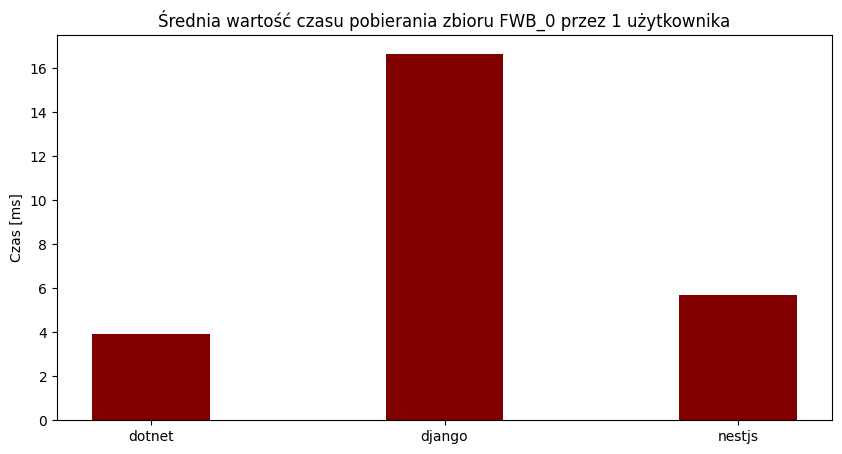

In [72]:
# creating the dataset
frameworks = list(data["apps"].keys())
mean_duration = [df_2[column_name].mean() for column_name in df_2.columns]
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(frameworks, mean_duration, color ='maroon', 
        width = 0.4)
 
# plt.xlabel("Courses offered")
plt.ylabel("Czas [ms]")
plt.title("Średnia wartość czasu pobierania zbioru FWB_0 przez 1 użytkownika")
# plt.show()
plt.savefig('Mean_duration_for_1_user.png')

Text(0.5, 1.0, 'Quantity of records for dotnet with 1 user')

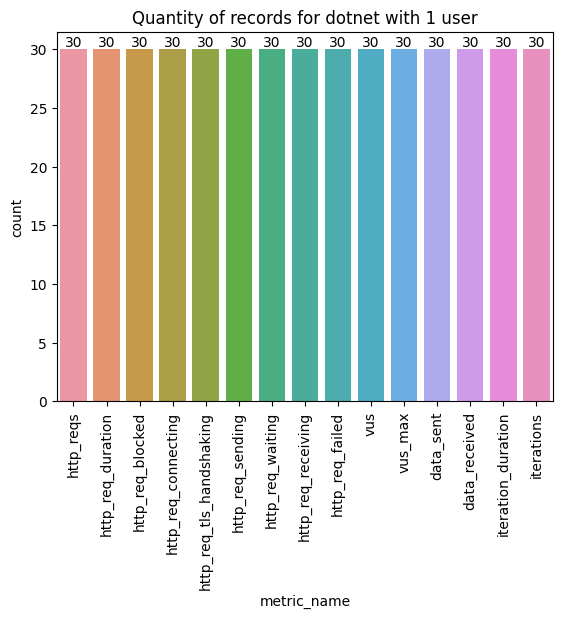

In [ ]:
index = 0
fw = data["apps"][list(data["apps"].keys())[index]]
df = fw['df']

chart = sns.countplot(data=df, x='metric_name')
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
chart.bar_label(chart.containers[0])
chart.set_title(f'Quantity of records for {fw["name"]} with {data["vus"]} {"users" if data["vus"] > 1 else "user"}')


Text(0.5, 1.0, 'Quantity of records for django with 1 user')

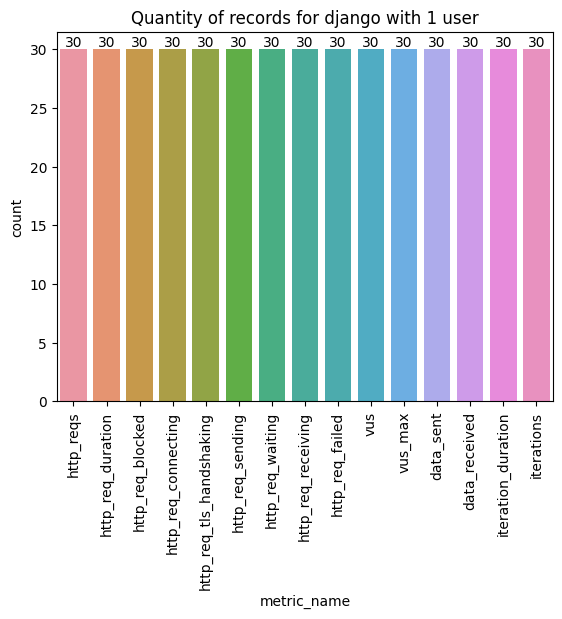

In [ ]:
index = 1
fw = data["apps"][list(data["apps"].keys())[index]]
df = fw['df']
chart = sns.countplot(data=df, x='metric_name')
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
chart.bar_label(chart.containers[0])
chart.set_title(f'Quantity of records for {fw["name"]} with {data["vus"]} {"users" if data["vus"] > 1 else "user"}')

Text(0.5, 1.0, 'Quantity of records for nestjs with 1 user')

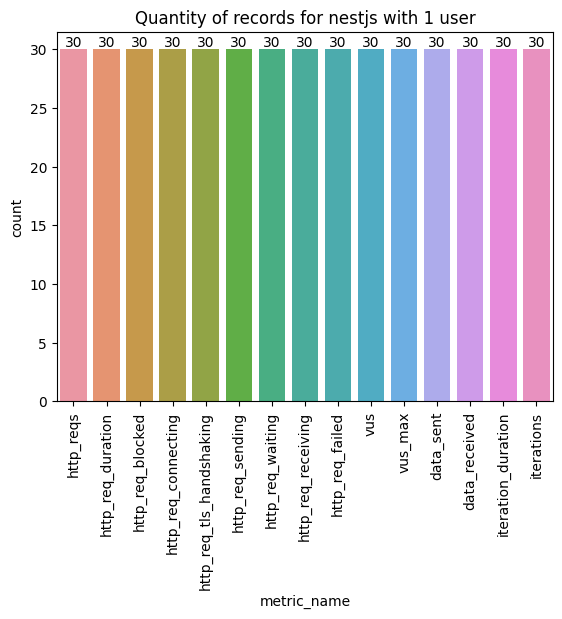

In [ ]:
index = 2
fw = data["apps"][list(data["apps"].keys())[index]]
df = fw['df']
chart = sns.countplot(data=df, x='metric_name')
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
chart.bar_label(chart.containers[0])
chart.set_title(f'Quantity of records for {fw["name"]} with {data["vus"]} {"users" if data["vus"] > 1 else "user"}')